In [38]:
%matplotlib notebook
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [39]:
import numpy as np
import pandas as pd

In [40]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [41]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [42]:
engine = create_engine("sqlite:///Resources/data.sqlite")

In [43]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [44]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

2016-08-23


C:\Users\lsrin\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version


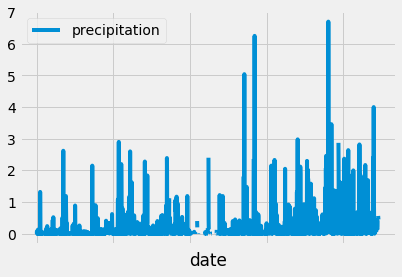

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last date
lastdate = dt.date(2017,8,23) - dt.timedelta(days = 365)
print(lastdate)


# Perform a query to retrieve the data and precipitation scores
precipquery = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= lastdate).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(precipquery, columns = ["date","precipitation"])

df.set_index(df["date"],inplace = True)
# Sort the dataframe by date
df.sort_values("date")
df.head()
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

# Rotate the xticks for the dates

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
# How many stations are available in this dataset?
stationquery = session.query(func.count(Station.station)).all()
stationquery


[(9)]

In [14]:
# What are the most active stations?
# List the stations and the counts in descending order.
stationcount = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
stationcount

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

min_max_avg = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).all()
min_max_avg

[(53.0, 87.0, 73.09795396419437)]

In [16]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

stationcounts = session.query(Measurement.tobs, func.count(Measurement.tobs)).filter_by(station=stationcount[0][0]).group_by(Measurement.tobs).order_by(Measurement.tobs.desc()).filter(Measurement.date >= lastdate).all()
stationcounts 


[(83.0, 1),
 (82.0, 3),
 (81.0, 4),
 (80.0, 11),
 (79.0, 18),
 (78.0, 22),
 (77.0, 31),
 (76.0, 33),
 (75.0, 33),
 (74.0, 39),
 (73.0, 18),
 (72.0, 22),
 (71.0, 18),
 (70.0, 22),
 (69.0, 19),
 (68.0, 12),
 (67.0, 15),
 (66.0, 5),
 (65.0, 7),
 (64.0, 3),
 (63.0, 4),
 (62.0, 6),
 (61.0, 1),
 (60.0, 2),
 (59.0, 3)]

In [17]:
dfs = pd.DataFrame(stationcounts, columns = ["tobs", "frequency"])
x = dfs['tobs']
y = dfs['frequency']

# Rotate the xticks for the dates
dfs

,tobs,frequency
0,83.0,1
1,82.0,3
2,81.0,4
3,80.0,11
4,79.0,18
5,78.0,22
6,77.0,31
7,76.0,33
8,75.0,33
9,74.0,39


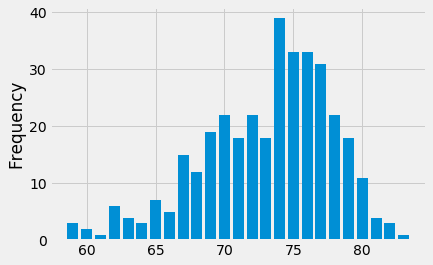

In [18]:
plt.bar(x,y,align='center')
plt.ylabel('Frequency')
plt.show()

In [19]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
       return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
       filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all();
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [20]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
def calc_temps(start_date, end_date):
       return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
       filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all();
print(calc_temps('2011-02-28', '2011-03-05'))

[(61.0, 69.75510204081633, 75.0)]


In [21]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [22]:
start_date = ('2011-02-28')
end_date =('2011-03-05')


y_val = session.query(func.avg(Measurement.tobs)).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
lower_error = session.query(func.min(Measurement.tobs)).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
upper_error = session.query(func.max(Measurement.tobs)).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
asymmetric_error = [lower_error, upper_error]

upper_error[0][0]

75.0

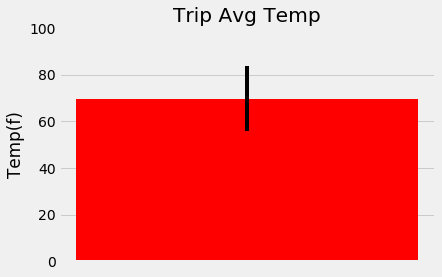

In [23]:


plt.bar( 0, y_val[0], align ="center", color="red", yerr= upper_error[0][0]-lower_error[0][0])
plt.ylabel('Temp(f)')
plt.title('Trip Avg Temp')
plt.yticks(np.arange(0, 120, 20))
plt.xticks(np.arange(0))

plt.show()



In [24]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation


In [32]:
start_date = ('2011-02-28')
end_date =('2011-03-05')

def calc_prcp(start_date, end_date):
       return session.query(Measurement.station, Station.name,Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).\
       filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all();
     
    
       
print(calc_prcp('2011-02-28', '2011-03-05'))


[('USC00513117', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 12.96000000000001), ('USC00514830', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 17.640000000000008), ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 13.04999999999999), ('USC00519281', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 20.07000000000001), ('USC00519397', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 12.420000000000003), ('USC00519523', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 19.709999999999987), ('USC00511918', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 5.669999999999999), ('USC00518838', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 20.970000000000006), ('USC00517948', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, None)]


## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
